In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
train_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,...,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,...,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,...,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [3]:
test_data = pd.read_csv("test.csv")
test_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,7732500270,20140925T000000,4,2.50,2820,15000,2.0,0,0,4,9,2820,0,1985,0,98052,47.7255,-122.101,2440,15000
5400,3856903515,20141222T000000,3,2.00,1460,6250,1.5,0,0,4,7,1460,0,1912,0,98103,47.6693,-122.333,1690,4750
5401,2557000400,20150409T000000,3,2.50,2070,9900,1.0,0,0,3,8,1420,650,1979,0,98023,47.2988,-122.371,2070,8250
5402,4386700135,20141114T000000,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

only date is object rest all numerical 

In [5]:
train_data["date"].nunique()

366

In [6]:
train_data["date"]

0        20150505T000000
1        20140708T000000
2        20150115T000000
3        20150427T000000
4        20141205T000000
              ...       
16204    20141113T000000
16205    20141111T000000
16206    20140930T000000
16207    20140620T000000
16208    20150325T000000
Name: date, Length: 16209, dtype: object

In [7]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data["date"] = pd.to_datetime(test_data["date"])

In [8]:
# Extracting Year
train_data['year'] = train_data['date'].dt.year
test_data['year'] = test_data['date'].dt.year
# Extracting Month
train_data['month'] = train_data['date'].dt.month
test_data['month'] = test_data['date'].dt.month

# Extracting Day
train_data['day'] = train_data['date'].dt.day
test_data['day'] = test_data['date'].dt.day

# You can even extract the day of the week (0=Monday, 6=Sunday)
train_data['day_of_week'] = train_data['date'].dt.dayofweek
test_data['day_of_week'] = test_data['date'].dt.dayofweek


In [9]:
train_data.drop(columns=["id","date"], inplace=True)
test_data.drop(columns=["id","date"], inplace=True)

In [10]:
train_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
day_of_week      0
dtype: int64

In [11]:
test_data.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
day_of_week      0
dtype: int64

In [12]:
train_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
count,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,...,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,...,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707,2014.321982,6.581159,15.656055,2.007465
std,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,...,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012,0.467250,3.113352,8.647084,1.458248
min,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000,2014.000000,4.000000,8.000000,1.000000
50%,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,2.000000
75%,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000,2015.000000,9.000000,23.000000,3.000000
max,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,6.000000


In [13]:
train_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [14]:
train_data["yr_renovated"].unique()

array([   0, 1997, 2014, 1987, 1992, 1979, 1994, 1963, 2013, 1983, 1995,
       2005, 1969, 1986, 2002, 2003, 1968, 1989, 1996, 2000, 2004, 2011,
       1982, 2006, 1993, 2010, 1998, 2007, 2008, 1980, 2015, 1955, 1991,
       2001, 1973, 1940, 1970, 1990, 1971, 1977, 2012, 1985, 1988, 1957,
       2009, 1981, 1999, 1976, 1960, 1967, 1962, 1958, 1978, 1946, 1984,
       1945, 1975, 1974, 1944, 1972, 1959, 1964, 1965, 1950, 1934, 1951,
       1948, 1954, 1956])

In [15]:
cat_cols = ["bedrooms","bathrooms","floors","waterfront","view","grade","condition","year","month","day_of_week"]

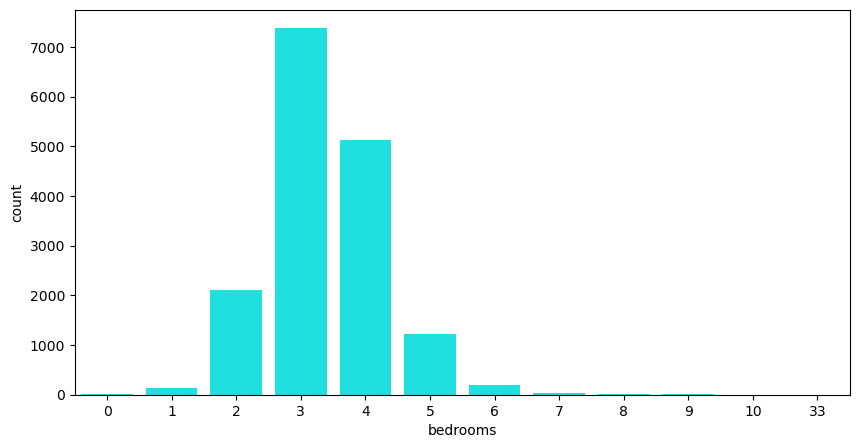

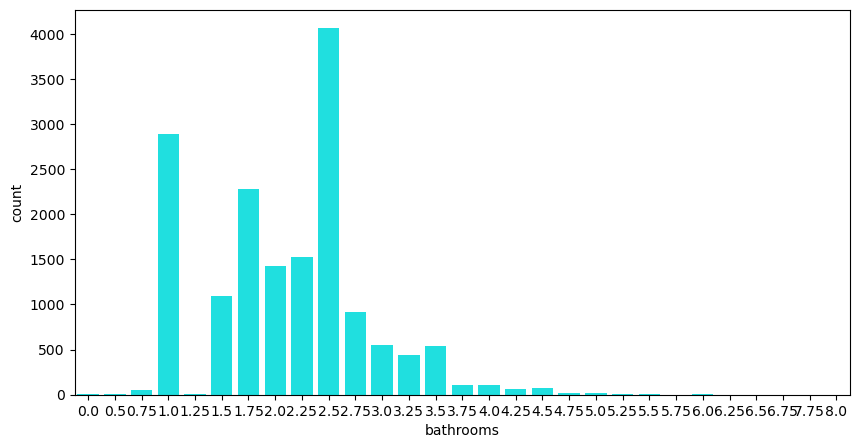

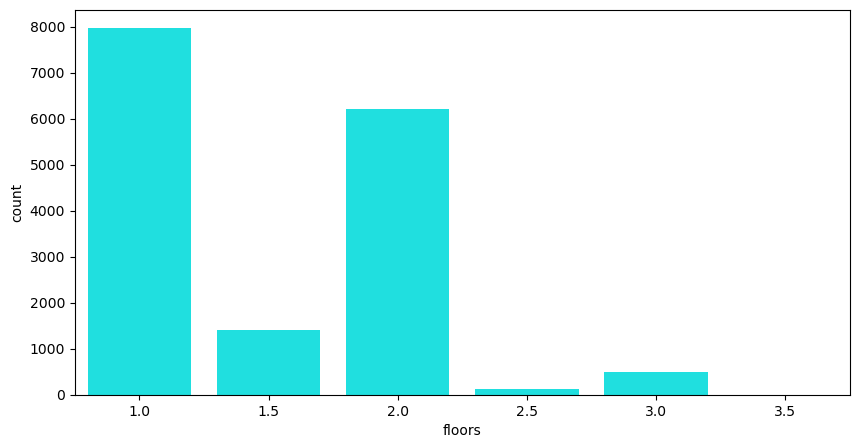

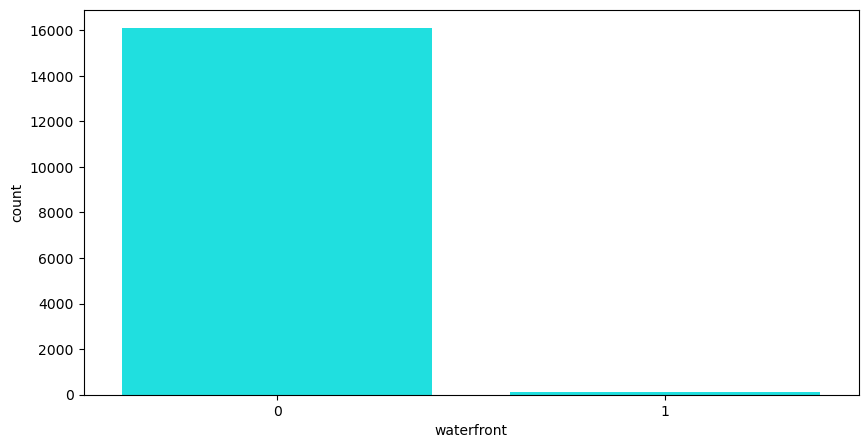

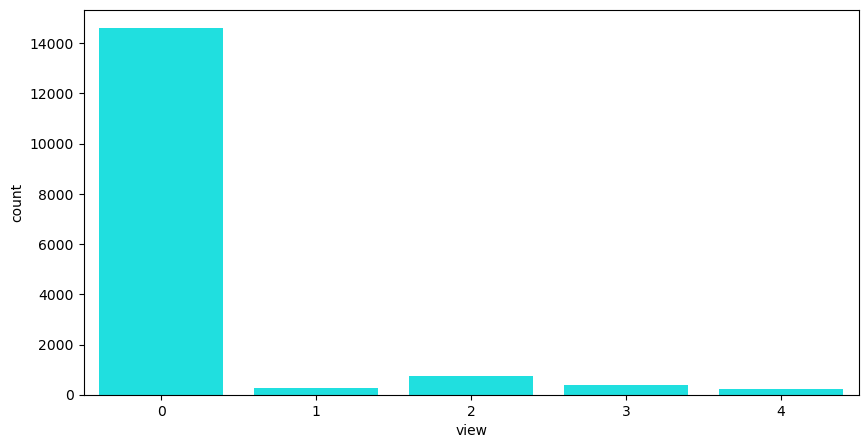

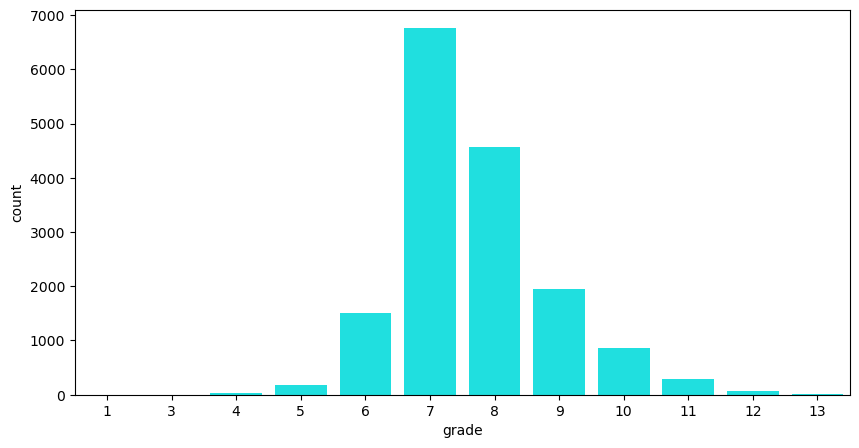

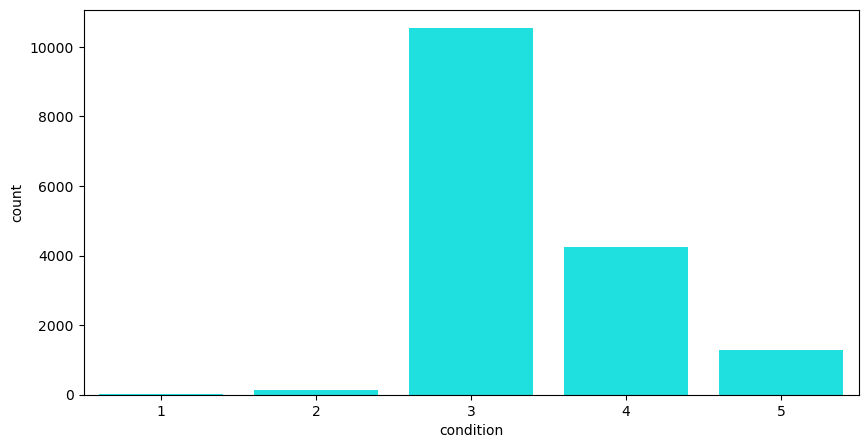

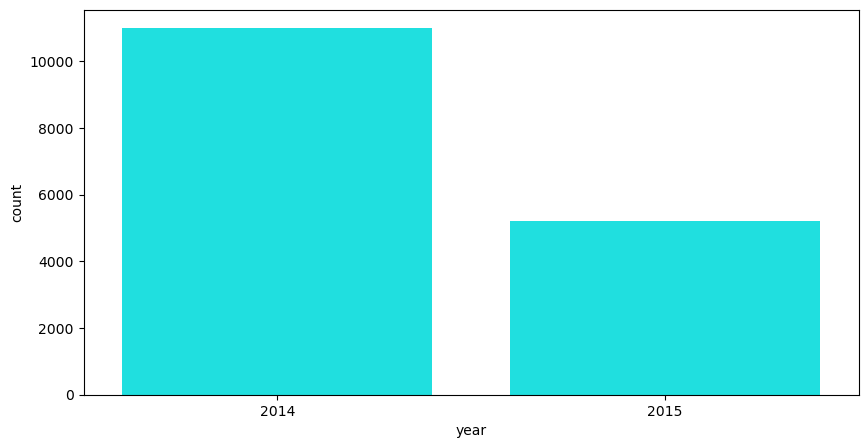

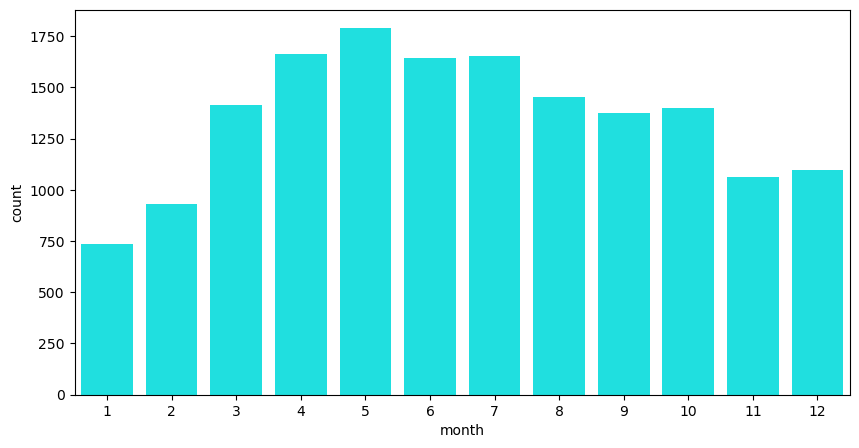

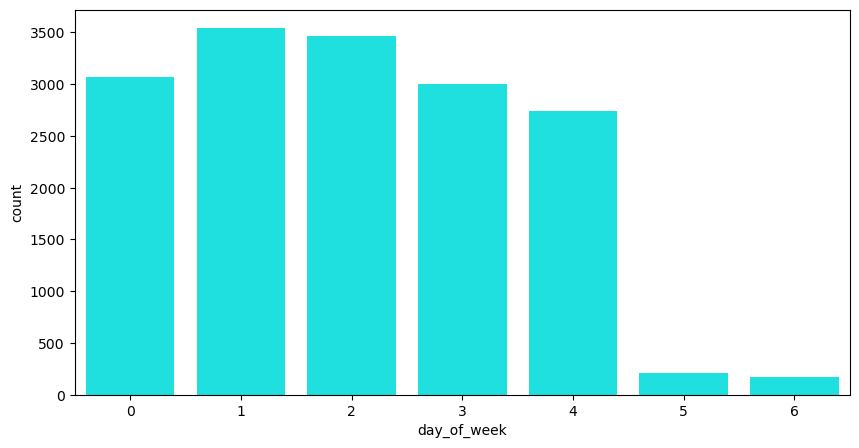

In [16]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=train_data, x=col,color="cyan")
    plt.show()

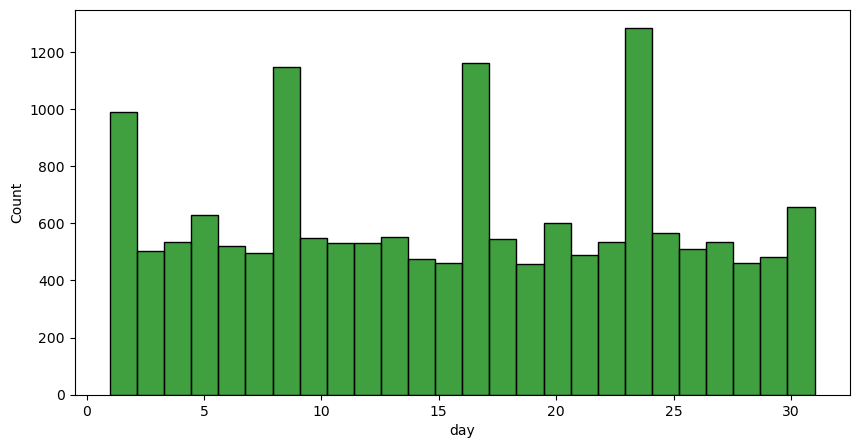

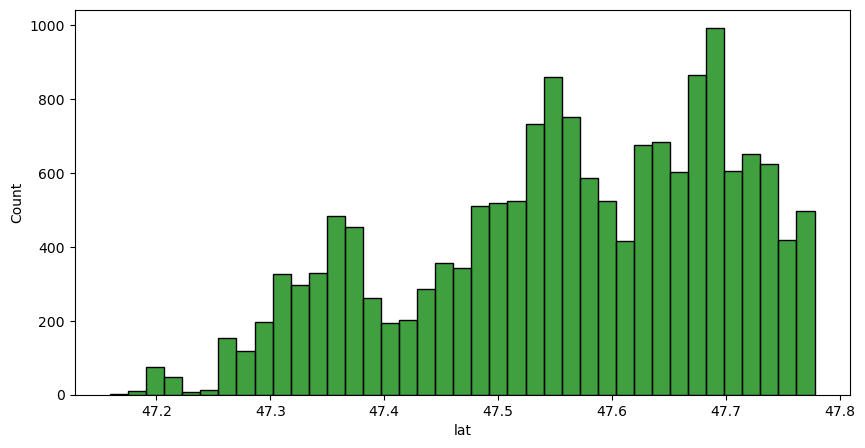

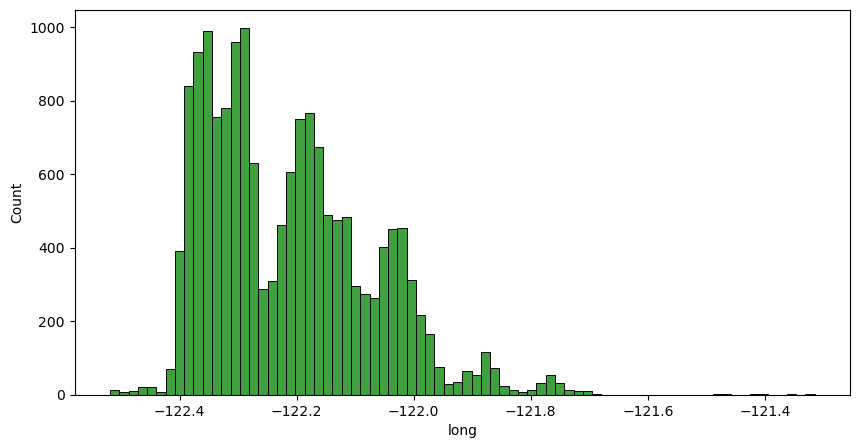

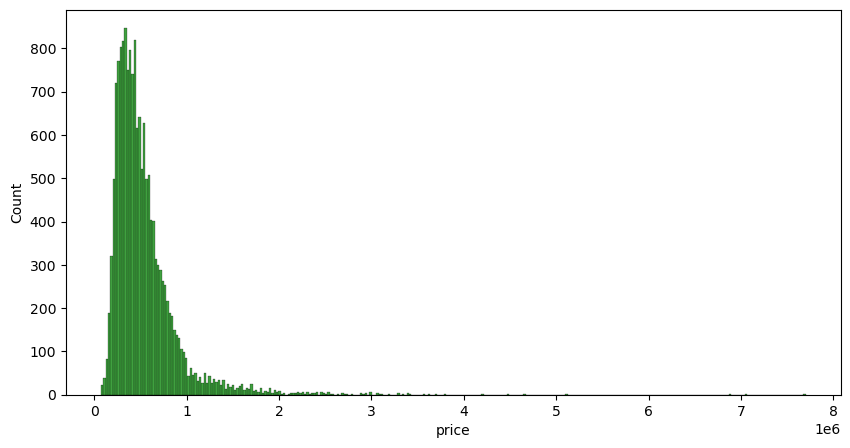

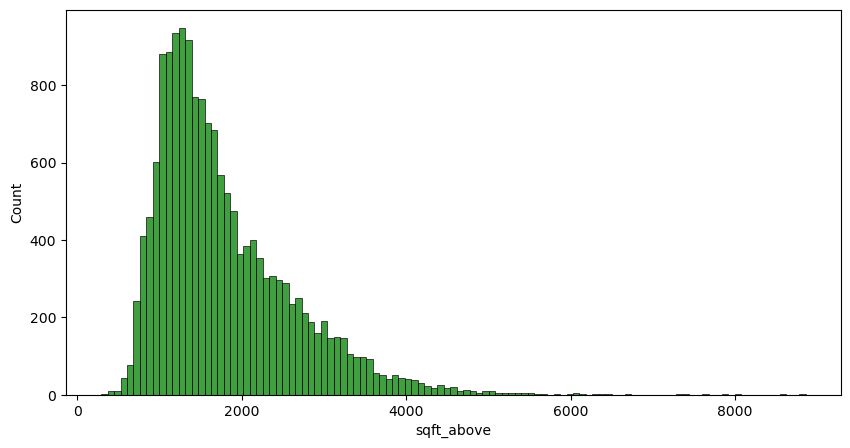

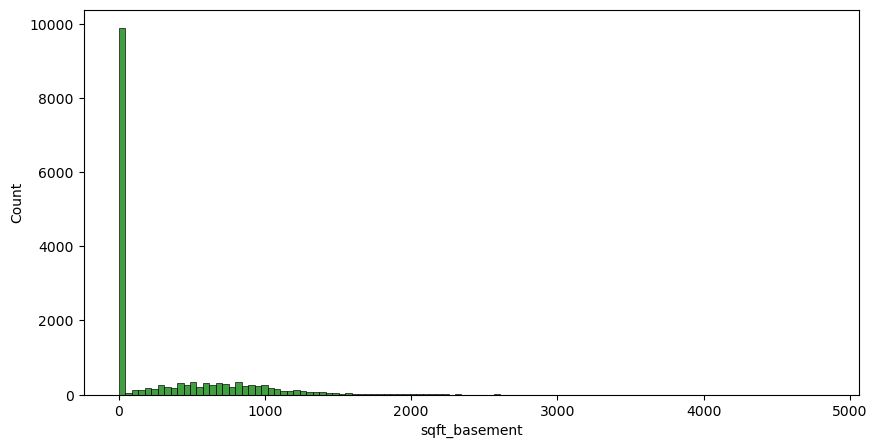

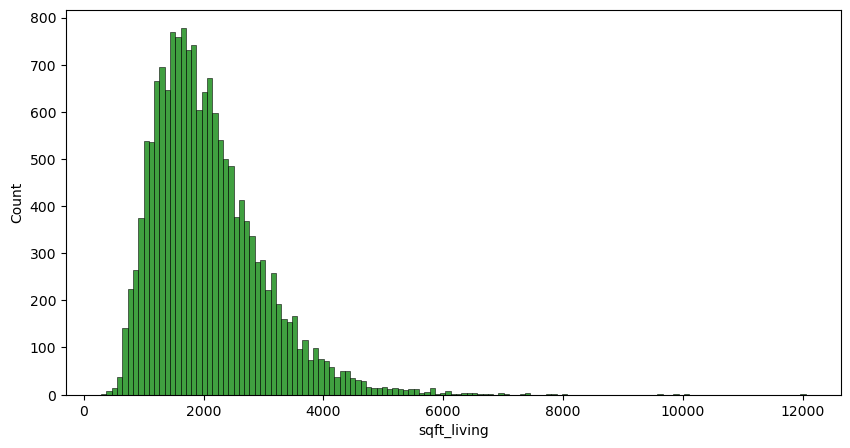

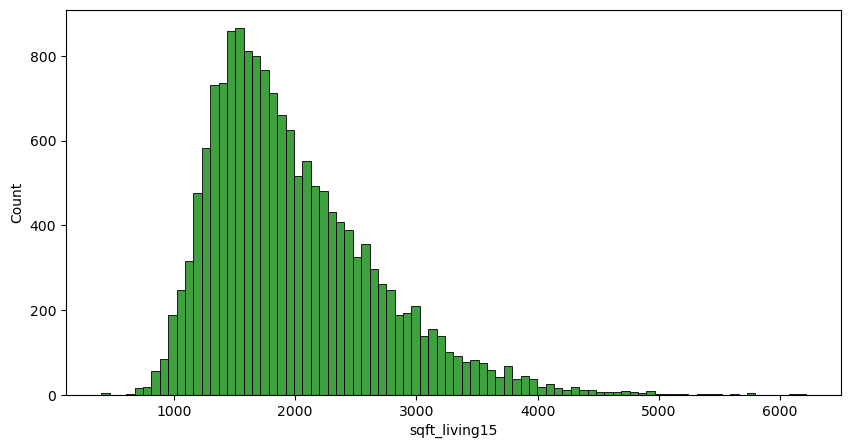

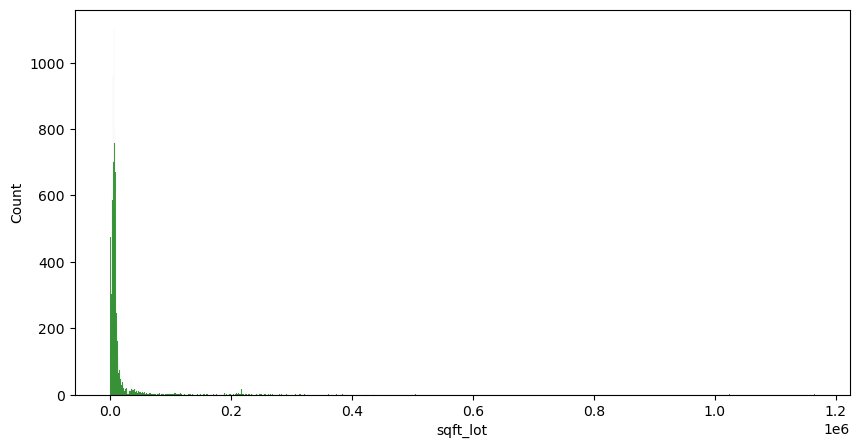

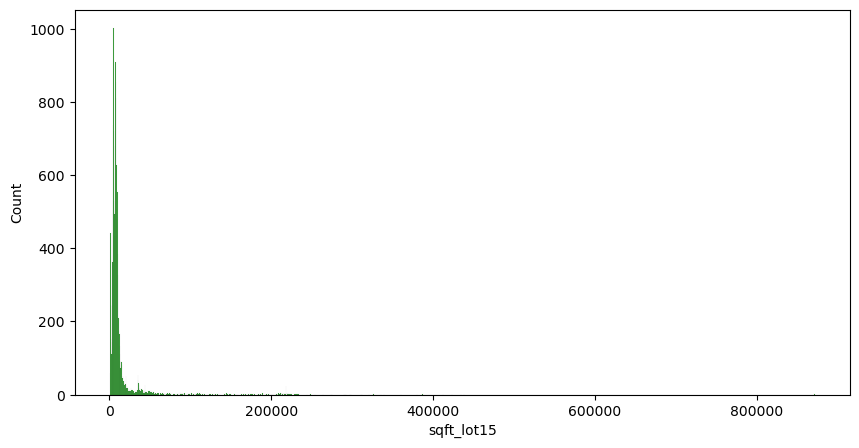

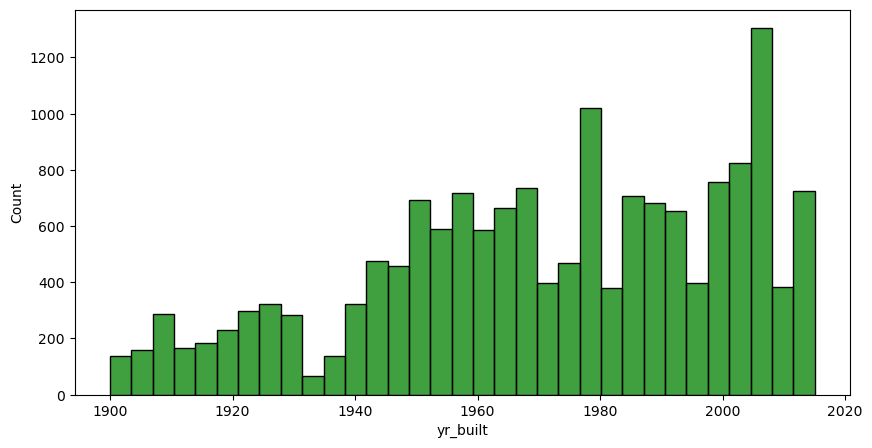

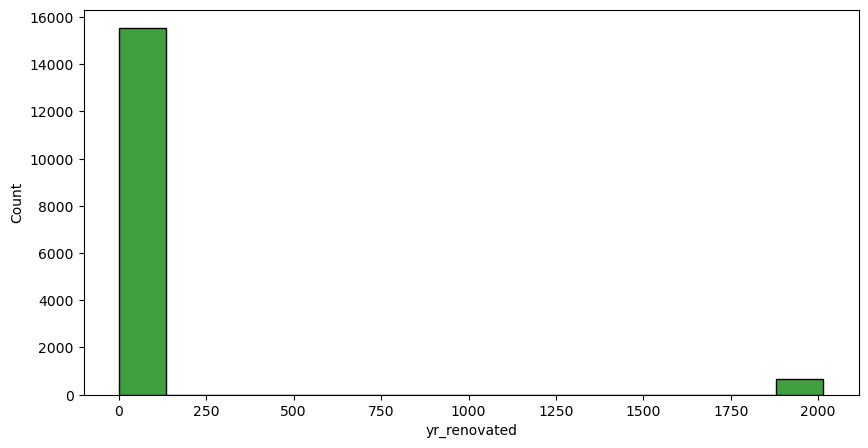

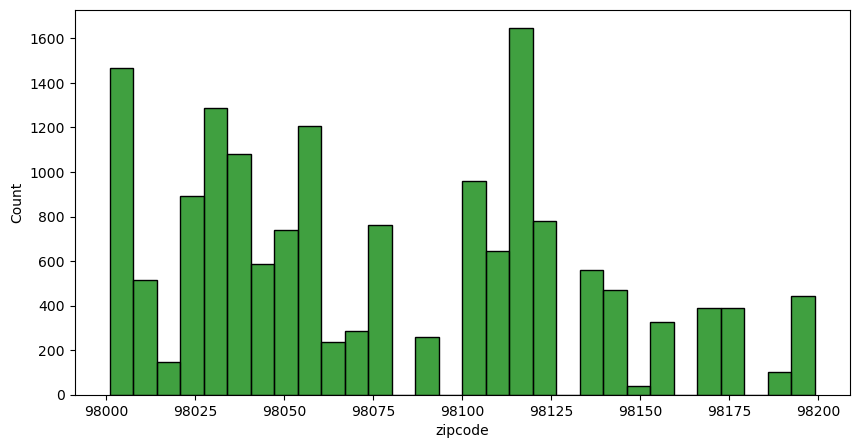

In [17]:
numerical_cols = train_data.columns.difference(cat_cols)

for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=train_data, x=col, color="green")
    plt.show()

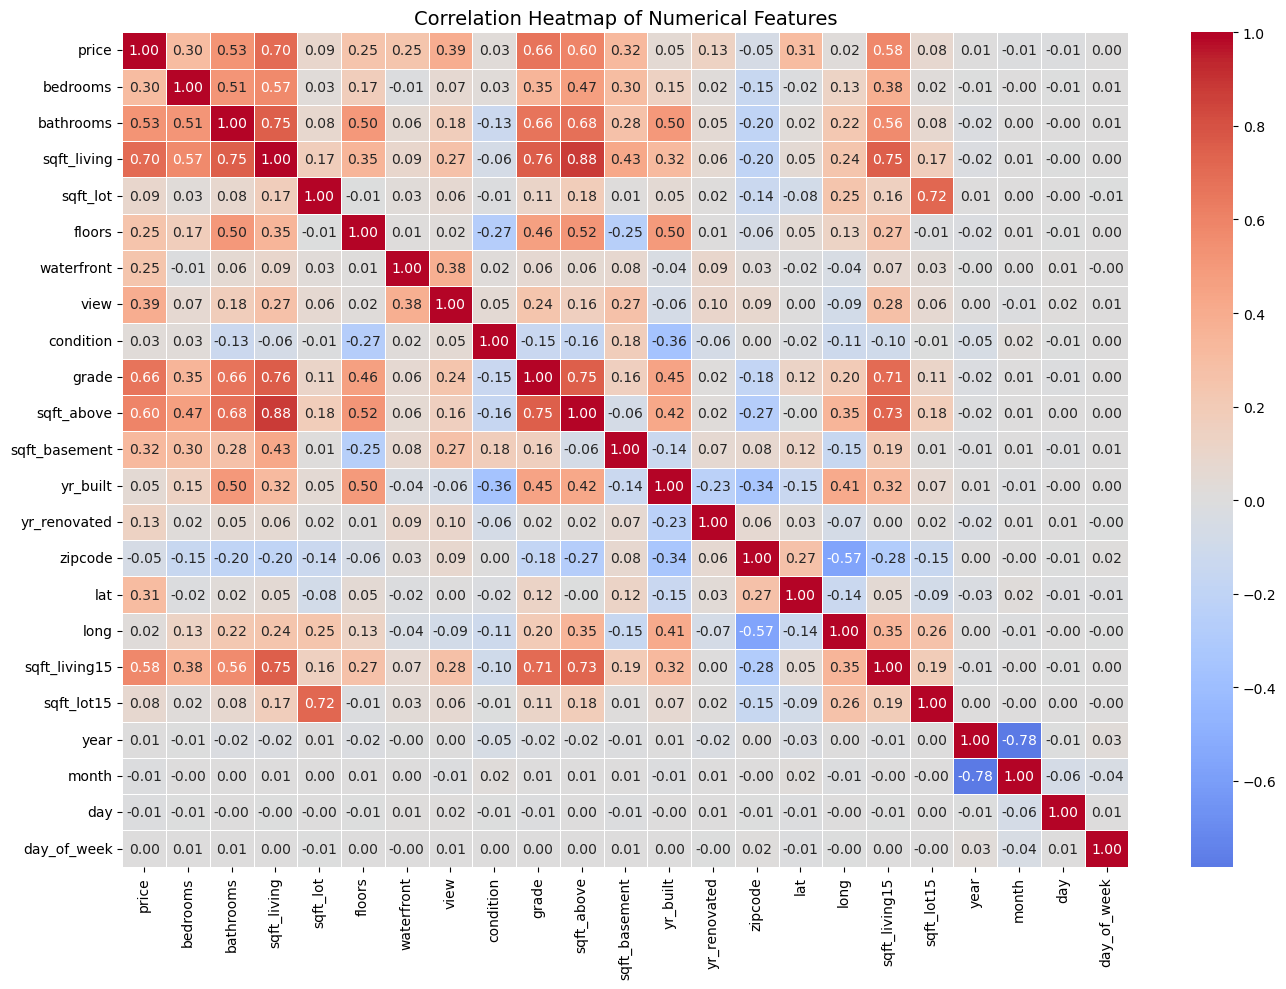

In [49]:
corr = train_data.corr()
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


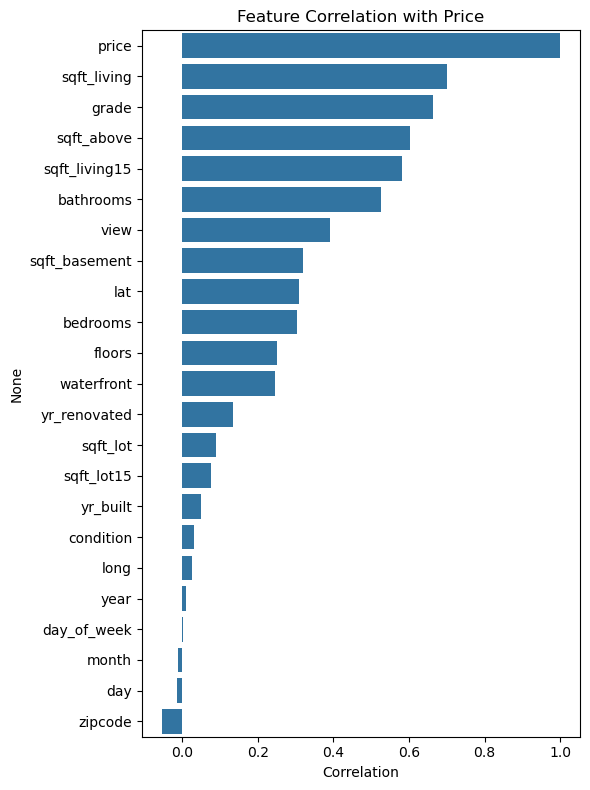

In [50]:
price_corr = corr["price"].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.barplot(x=price_corr.values, y=price_corr.index)
plt.title("Feature Correlation with Price")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


In [18]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,268643,4,2.25,1810,9240,2.0,0,0,3,7,...,0,98055,47.4362,-122.187,1660,9240,2015,5,5,1
1,245000,3,2.50,1600,2788,2.0,0,0,4,7,...,0,98031,47.4034,-122.187,1720,3605,2014,7,8,1
2,200000,4,2.50,1720,8638,2.0,0,0,3,8,...,0,98003,47.2704,-122.313,1870,7455,2015,1,15,3
3,352499,2,2.25,1240,705,2.0,0,0,3,7,...,0,98027,47.5321,-122.073,1240,750,2015,4,27,0
4,232000,3,2.00,1280,13356,1.0,0,0,3,7,...,0,98042,47.3715,-122.074,1590,8071,2014,12,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,378000,3,1.50,1000,6914,1.0,0,0,3,7,...,0,98125,47.7144,-122.319,1000,6947,2014,11,13,3
16205,399950,3,2.50,3087,5002,2.0,0,0,3,8,...,0,98023,47.2974,-122.349,2927,5183,2014,11,11,1
16206,575000,3,2.50,2120,4780,2.0,0,0,3,7,...,0,98053,47.6810,-122.032,1690,2650,2014,9,30,1
16207,245000,1,0.75,380,15000,1.0,0,0,3,5,...,0,98168,47.4810,-122.323,1170,15000,2014,6,20,4


In [19]:
X=train_data.drop(columns=["price"])
y=train_data.price

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, random_state=7)

In [21]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler().set_output(transform="pandas")
x_train_scaled = sclr.fit_transform(x_train)
x_valid_scaled = sclr.transform(x_valid)
test_data_scaled = sclr.transform(test_data)

creating separate variable for scaled data to use in ann, knn etc and use normal in tree models

### 1] Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=20)
dt.fit(x_train,y_train)
y_prd = dt.predict(x_valid)

In [23]:
from sklearn.metrics import root_mean_squared_error, r2_score
dt_rmse = root_mean_squared_error(y_valid, y_prd)
dt_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("RMSE: ", dt_rmse)
print("R2 score: ", dt_r2)

RMSE:  162752.4031661142
R2 score:  0.781609150513637


### 2] KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train_scaled,y_train)
y_prd = knn.predict(x_valid_scaled)


In [25]:
from sklearn.metrics import root_mean_squared_error, r2_score
knn_rmse = root_mean_squared_error(y_valid, y_prd)
knn_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("KNN")
print("RMSE: ", knn_rmse)
print("R2 score: ", knn_r2)

KNN
RMSE:  201767.55455433065
R2 score:  0.6643533798877086


### 3] Random Forest 

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_prd = rf.predict(x_valid)

In [27]:
from sklearn.metrics import root_mean_squared_error, r2_score
rf_rmse = root_mean_squared_error(y_valid, y_prd)
rf_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("Random forest")
print("RMSE: ", rf_rmse)
print("R2 score: ", rf_r2)

Random forest
RMSE:  124335.2058115526
R2 score:  0.8725417789195629


### 4] XGBoost

In [28]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.02, max_depth=6, device='cuda',n_jobs=-1)
xgb.fit(x_train, y_train)
y_prd = xgb.predict(x_valid)

c:\Users\awate\.conda\envs\ml_env\lib\site-packages\xgboost\core.py:729: UserWarning: [10:04:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


remove device="cuda" if your device doesnt have gpu

In [29]:
from sklearn.metrics import root_mean_squared_error, r2_score
xgb_rmse = root_mean_squared_error(y_valid, y_prd)
xgb_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("XGBoost")
print("RMSE: ", xgb_rmse)
print("R2 score: ", xgb_r2)

XGBoost
RMSE:  109927.2734375
R2 score:  0.9003698825836182


### 5] ANN

In [30]:
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

ann = Sequential()
ann.add(Dense(64,input_dim=22,activation="relu"))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(Dense(128,activation="relu"))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(Dense(128,activation="relu"))
ann.add(Dense(1,activation="linear"))

c:\Users\awate\.conda\envs\ml_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,201 (106.25 KB)

 Trainable params: 26,817 (104.75 KB)

 Non-trainable params: 384 (1.50 KB)

In [36]:
ann.compile(optimizer="adam", loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [43]:
ann.fit(
    x_train_scaled,
    y_train_log,
    validation_data=(x_valid_scaled, y_valid_log),
    epochs=200,
    batch_size=64,
    #callbacks=callbacks,
    verbose=1
)


Epoch 1/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0522 - root_mean_squared_error: 0.2284 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1952
Epoch 2/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0522 - root_mean_squared_error: 0.2285 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1973
Epoch 3/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0514 - root_mean_squared_error: 0.2267 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1864
Epoch 4/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0498 - root_mean_squared_error: 0.2232 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2011
Epoch 5/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0501 - root_mean_squared_error: 0.2239 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2011
Epoch 6/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0533 - root_mean_squared_error: 0.2310 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2144
Epoch 7/200
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

In [44]:
y_pred_log = ann.predict(x_valid_scaled).ravel()
y_prd = np.expm1(y_pred_log)
ann_rmse = root_mean_squared_error(y_valid, y_prd)
ann_r2 = r2_score(y_true=y_valid, y_pred=y_prd)
print("ANN")
print("RMSE: ", ann_rmse)
print("R2 score: ", ann_r2)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN
RMSE:  161664.8125
R2 score:  0.7845181822776794


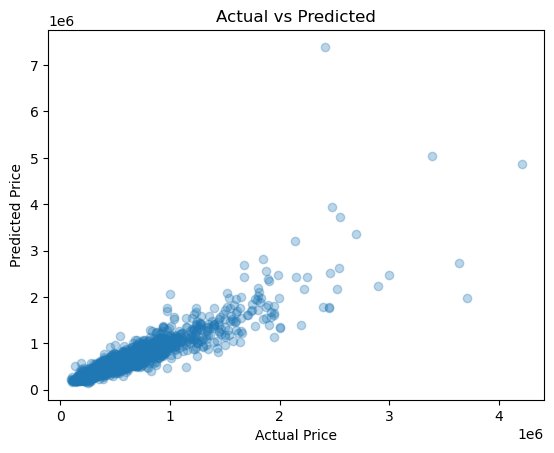

In [46]:
import matplotlib.pyplot as plt

plt.scatter(y_valid, y_prd, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


           Model           RMSE  R2 Score
0        XGBoost  109927.273438  0.900370
1  Random Forest  124335.205812  0.872542
2            ANN  161664.812500  0.784518
3  Decision Tree  162752.403166  0.781609
4            KNN  201767.554554  0.664353


C:\Users\awate\AppData\Local\Temp\ipykernel_20708\1314365502.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R2 Score', palette='viridis')


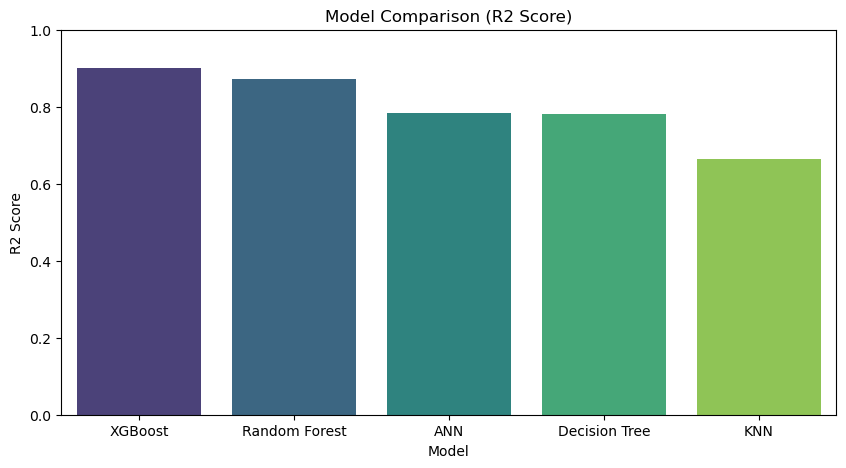

In [47]:
import pandas as pd

# 1. Create a dictionary with your results
results_data = {
    'Model': ['ANN', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [ann_rmse, knn_rmse, dt_rmse, rf_rmse, xgb_rmse],
    'R2 Score': [ann_r2, knn_r2, dt_r2, rf_r2, xgb_r2]
}

# 2. Convert to a DataFrame
results_df = pd.DataFrame(results_data)

# 3. Sort it to see the winner immediately
# (Sort by RMSE ascending = Lowest Error on top)
results_df = results_df.sort_values(by='RMSE', ascending=True)

# 4. Reset index for a clean look
results_df = results_df.reset_index(drop=True)

# 5. Display nicely
print(results_df)

# Optional: If you want to visualize it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='R2 Score', palette='viridis')
plt.title("Model Comparison (R2 Score)")
plt.ylim(0, 1) # Assuming R2 is between 0 and 1
plt.show()